In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from IPython.display import Audio
from numpy.fft import fft, ifft
import os
from scipy.signal import find_peaks
import pytest
%matplotlib inline


In [3]:
path = os.path.join(os.getcwd(),"Sound_Tests")
path

'C:\\Users\\pwn394\\Documents\\Code\\Sound-Processing-Project\\Sound_Tests'

In [4]:
os.listdir(path)

['34373__unclesigmund__bass60bpm.wav', 'beats.wav']

In [5]:
Fs, data = read(os.path.join(path,'beats.wav'))
data = data[:,0]
print("Sampling frequency is", Fs)

Sampling frequency is 44100


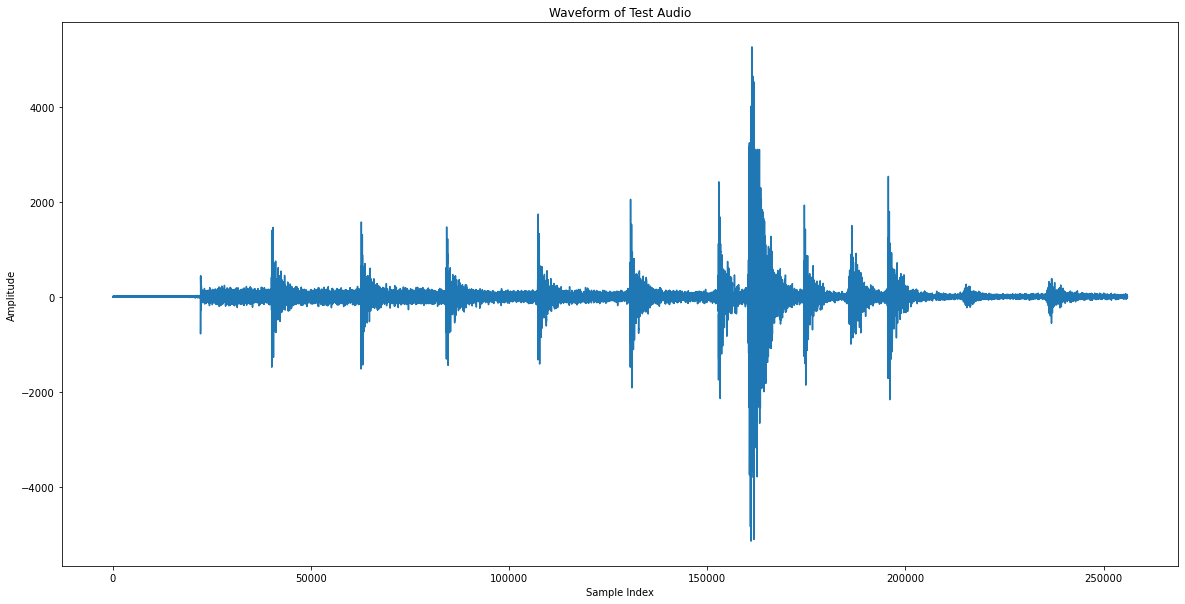

In [6]:
plt.figure(figsize=(20,10))
plt.plot(data)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Waveform of Test Audio')
plt.show()

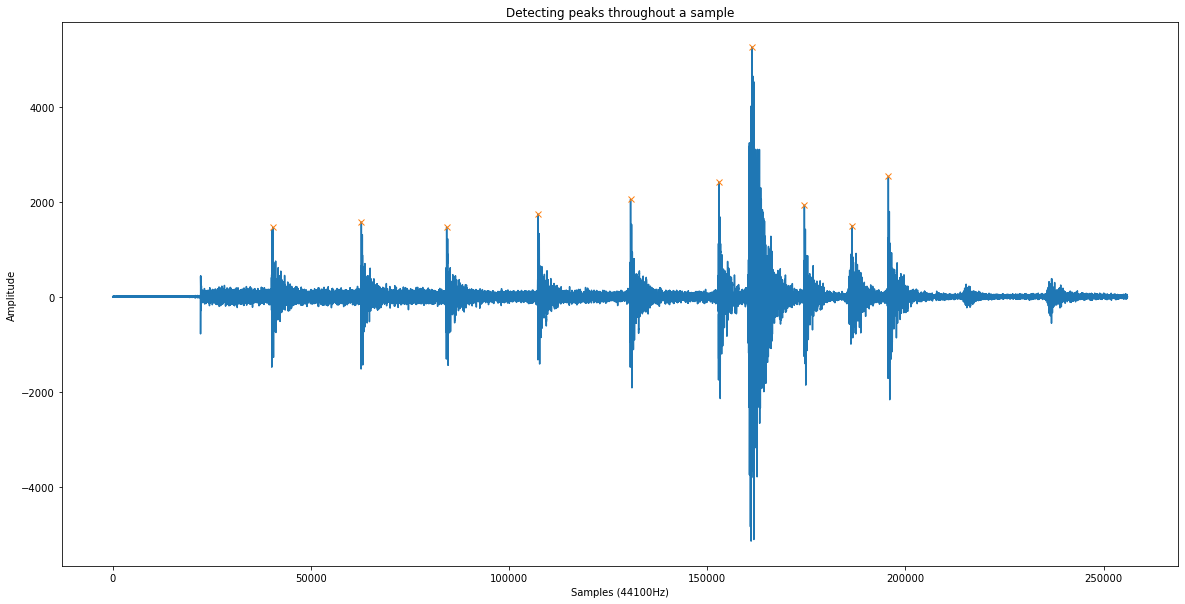

In [7]:
# Detecting peaks, fiddling with the distance and threshold
peaks, _ = find_peaks(data, distance = 5000, height = 1000)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(peaks, data[peaks], "x")
plt.xlabel(f"Samples ({Fs}Hz)")
plt.ylabel("Amplitude")
plt.title("Detecting peaks throughout a sample")
plt.show()

In [16]:
from typing import List
diffs : List[float] = []
for i in range(len(peaks)-1):
    diff = 60*(peaks[i+1] - peaks[i])/Fs
    diffs.append(diff)
    

In [17]:
diffs

[30.325170068027212,
 29.287074829931974,
 31.443537414965988,
 31.693877551020407,
 30.292517006802722,
 11.378231292517007,
 17.998639455782314,
 16.27891156462585,
 12.549659863945578]

In [31]:
beats = len(peaks)
time_diff_in_seconds = (peaks[len(peaks)-1] - peaks[0])/Fs
beats_per_minute = 60*beats/time_diff_in_seconds
print("beats:",beats)
print("time diff (seconds):",time_diff_in_seconds)
print("bpm:",beats_per_minute)

beats: 10
time diff (seconds): 3.520793650793651
bpm: 170.41612190613588


{'whiskers': [<matplotlib.lines.Line2D at 0x19cdc347780>,
 'caps': [<matplotlib.lines.Line2D at 0x19cdc347eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cdc347630>],
 'medians': [<matplotlib.lines.Line2D at 0x19cdc3565f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cdc356978>],
 'means': []}

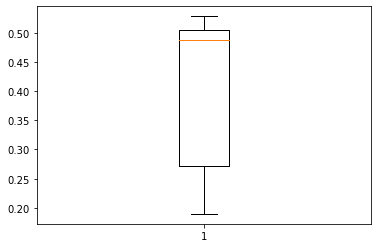

In [15]:
plt.boxplot(diffs)

# Now trying with actual 60bpm signal

In [38]:
soundtests_path = os.path.join(os.getcwd(),'Sound_Tests')
os.listdir(soundtests_path)

['213181__fenrirfangs__human-heartbeat-60-bpm.wav',
 '34373__unclesigmund__bass60bpm.wav',
 'beats.wav']

In [44]:
heartbeat_path = os.path.join(os.getcwd(),"Sound_Tests", "human-heartbeat-60-bpm.wav")

Sample rate: 44100 Hz


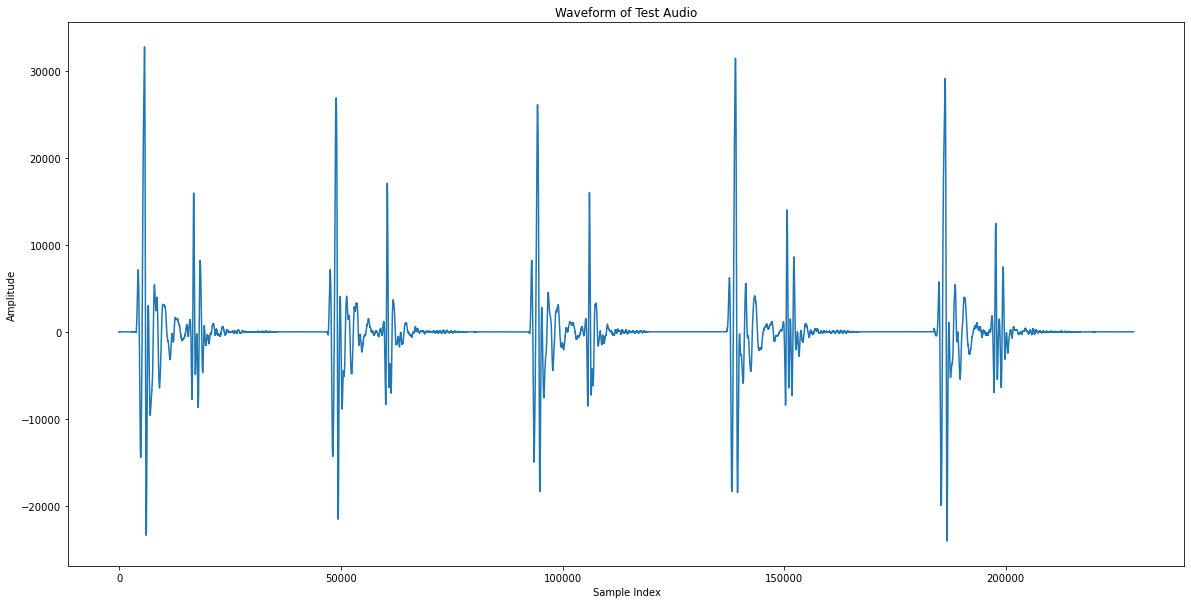

In [46]:
Fs_60bpm, data_60bpm = read(heartbeat_path)
print(f"Sample rate: {Fs_60bpm} Hz")
plt.figure(figsize=(20,10))
plt.plot(data_60bpm)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Waveform of Test Audio')
plt.show()

In [47]:
type(data_60bpm)

numpy.ndarray

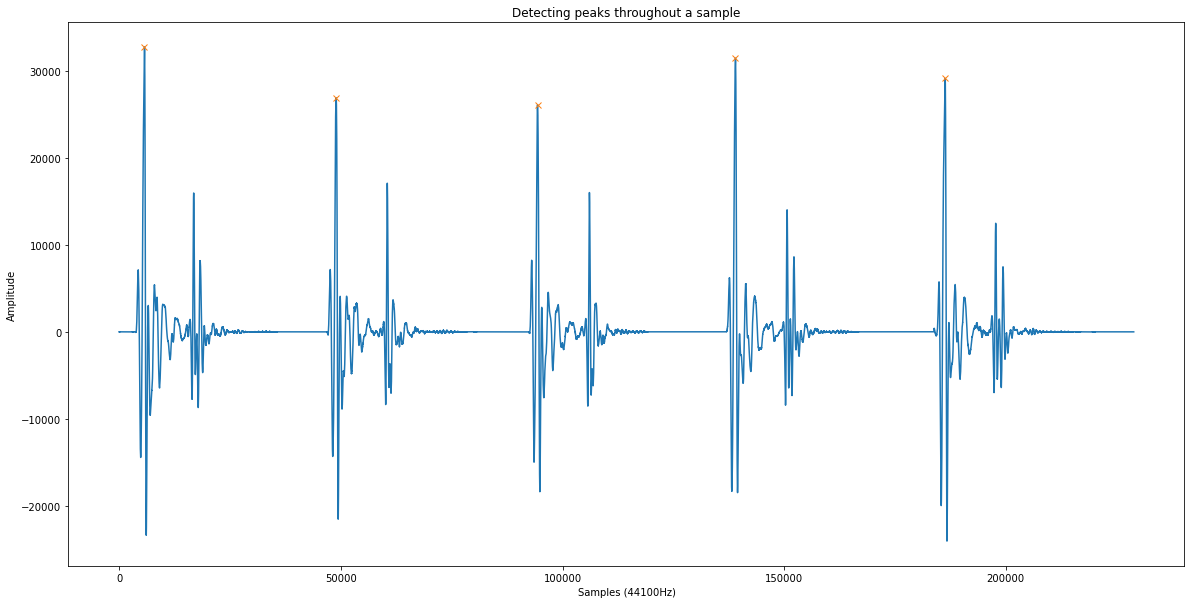

In [49]:
# Detecting peaks, fiddling with the distance and threshold
peaks, _ = find_peaks(data_60bpm, distance = 5000, height = 20000)
plt.figure(figsize=(20,10))
plt.plot(data_60bpm)
plt.plot(peaks, data_60bpm[peaks], "x")
plt.xlabel(f"Samples ({Fs}Hz)")
plt.ylabel("Amplitude")
plt.title("Detecting peaks throughout a sample")
plt.show()

In [51]:
Fs_60bpm

44100

In [55]:
beat_count = len(peaks)
timespan_in_seconds = (peaks[len(peaks)-1] - peaks[0])/Fs
diffs_in_seconds = []
for i in range(len(peaks)-1):
    diffs_in_seconds.append((peaks[i+1] - peaks[i])/Fs)

In [56]:
diffs_in_seconds

[0.9802947845804989, 1.0301814058956915, 1.012312925170068, 1.0727210884353742]

In [57]:
def bpm2bps(targetbpm: float) -> float:
    return targetbpm/60

In [59]:
bpm_60 = bpm2bps(60)

In [60]:
error_as_percentage = map(lambda eachDiff: (bpm_60 - eachDiff)/eachDiff, diffs_in_seconds)
[print(x) for x in error_as_percentage]

0.020101316185144883
-0.029297175937135347
-0.012163161077884514
-0.06779123596930689


[None, None, None, None]

In [61]:
np.mean(error_as_percentage)

TypeError: unsupported operand type(s) for /: 'map' and 'int'